EDA

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('data_final.csv')
df.shape

(6760, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6760 entries, 0 to 6759
Data columns (total 32 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Year of Project                                       6760 non-null   int64  
 1   Industry Sector                                       5472 non-null   object 
 2   Organisation Type                                     5483 non-null   object 
 3   Application Group                                     4449 non-null   object 
 4   Application Type                                      5115 non-null   object 
 5   Development Type                                      6760 non-null   object 
 6   Development Platform                                  5213 non-null   object 
 7   Business Area Type                                    2209 non-null   object 
 8   Language Type                                         5705

In [8]:
import pandas as pd

def feature_summary(df, output_path="feature_summary.xlsx"):
    summary = []

    for col in df.columns:
        dtype = df[col].dtype

        # Detect categorical vs continuous
        if pd.api.types.is_numeric_dtype(df[col]):
            feature_type = "Continuous"
            unique_vals = df[col].nunique()
        else:
            feature_type = "Categorical"
            unique_vals = df[col].nunique()

        summary.append({
            "Column": col,
            "Data Type": str(dtype),
            "Feature Type": feature_type,
            "Unique Values (if categorical)": unique_vals if feature_type=="Categorical" else "-",
            "% of Null Values": round((df[col].isnull().sum() / len(df)) * 100, 2)
        })

    summary_df = pd.DataFrame(summary)

    # Save to Excel
    summary_df.to_excel(output_path, index=False)
    print(f"Feature summary saved !")

    return summary_df


result=feature_summary(df)
print(result)


Feature summary saved !
                                               Column Data Type Feature Type  \
0                                     Year of Project     int64   Continuous   
1                                     Industry Sector    object  Categorical   
2                                   Organisation Type    object  Categorical   
3                                   Application Group    object  Categorical   
4                                    Application Type    object  Categorical   
5                                    Development Type    object  Categorical   
6                                Development Platform    object  Categorical   
7                                  Business Area Type    object  Categorical   
8                                       Language Type    object  Categorical   
9                        Primary Programming Language    object  Categorical   
10                                      Relative Size    object  Categorical   
11              

In [9]:
feature="Percentage of Uncollected Work Effort"
print(df[feature].unique())

[nan 'under 5%' 'Less than 5% of recorded effort'
 'Missing 30% For support and Business Users' 'Unable to estimate'
 'All effort included on study' '15-20%' '5% - 10% of recorded effort'
 "Don't Know" 'Less than 5% of recorded effort on study uncollect'
 'More than 10% of recorded effort' 'All effort on study included'
 'Unable to estimate effort on study'
 '5% - 10% of recorded effort on study uncollected'
 "Don't know effort on study"
 '12% over that recorded for out-of-hours effort' '5-20%'
 'Unable to estimate out-of-hours effort'
 '15% over that recorded for out-of-hours effort' '100%'
 '30% of total project on study']


In [12]:
feature="Client Server?"
print(df[feature].unique())

['No' 'Yes' nan "Don't Know" 'Not Applicable']


In [14]:
df.describe()

,Year of Project,Functional Size,Adjusted Function Points,Lines of Code,Resource Level,Max Team Size,Average Team Size,Project Inactive Time,Ratio of Project Work Effort to Non-Project Activity,Summary Work Effort,Project Elapsed Time
count,6760.000000,5768.000000,5486.000000,5.220000e+02,6656.000000,2327.000000,708.000000,2466.000000,1113.000000,6742.000000,5908.000000
mean,2003.605621,356.459431,388.460809,4.631179e+05,1.386569,17.284787,6.409534,0.817502,0.949582,4596.095966,8.405988
std,5.259427,769.818858,972.570762,6.610394e+06,0.913572,27.865598,9.471686,3.447622,0.117988,16025.095076,7.320625
min,1989.000000,1.000000,3.000000,9.600000e+01,1.000000,0.500000,0.300000,0.000000,0.000000,2.000000,0.030000
25%,2000.000000,65.750000,64.000000,5.458000e+03,1.000000,4.000000,2.000000,0.000000,0.990000,592.000000,3.600000
50%,2004.000000,150.000000,150.000000,1.725550e+04,1.000000,7.000000,3.850000,0.000000,1.000000,1610.500000,6.100000
75%,2007.000000,354.000000,351.750000,4.796950e+04,1.000000,18.000000,7.000000,0.000000,1.000000,4149.500000,11.000000
max,2014.000000,19050.000000,20000.000000,1.423220e+08,4.000000,468.000000,182.700000,65.000000,1.000000,645694.000000,87.000000


In [15]:
df.shape

(6760, 32)

In [24]:
def find_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return round((len(outliers)/(len(df)-df[col].isnull().sum()) ) * 100, 2)


lst = []
for col in df.select_dtypes(include=['int64', 'float64']).columns:  # only numeric
    count = find_outliers(col)
    lst.append((col,count))

print(f"Total numeric columns: {len(lst)}")
print(lst)  # will show outlier count for each column


Total numeric columns: 11
[('Year of Project', np.float64(0.07)), ('Functional Size', np.float64(10.21)), ('Adjusted Function Points', np.float64(10.85)), ('Lines of Code', np.float64(12.07)), ('Resource Level', np.float64(17.05)), ('Max Team Size', np.float64(11.09)), ('Average Team Size', np.float64(9.6)), ('Project Inactive Time', np.float64(22.83)), ('Ratio of Project Work Effort to Non-Project Activity', np.float64(20.58)), ('Summary Work Effort', np.float64(10.12)), ('Project Elapsed Time', np.float64(5.01))]


In [26]:
print(df.duplicated().sum())


15


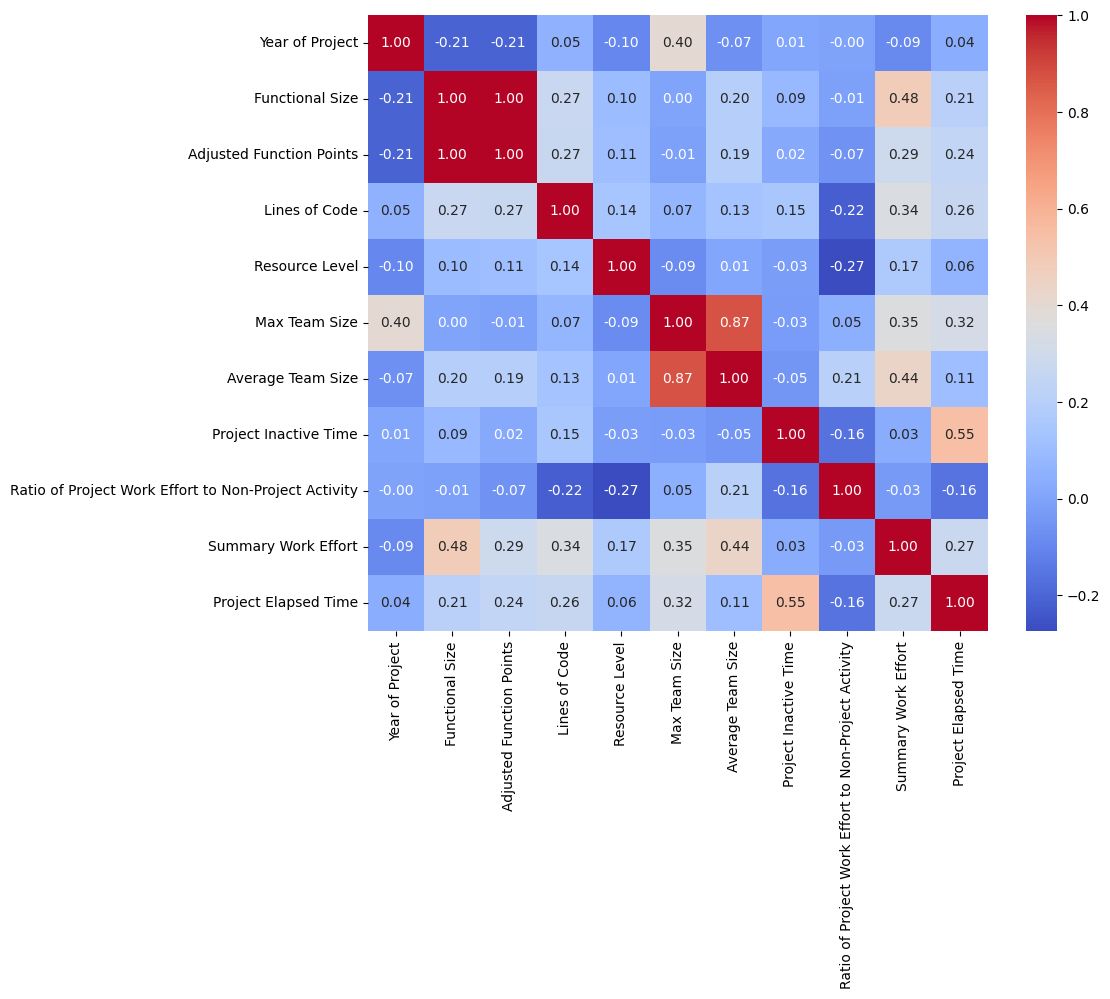

In [29]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [30]:
# List of categorical features
categorical_features = [
    "Development Techniques",
    "Development Methodologies",
    "Business Area Type",
    "Package Customisation",
    "Team Size Group",
    "Client Server?",
    "Architecture",
    "Application Group",
    "Used Methodology",
    "Application Type",
    "Primary Programming Language",
    "Development Platform",
    "Industry Sector",
    "Organisation Type",
    "Language Type",
    "Relative Size",
    "Development Type"
]

# Print unique categories for each feature
for feature in categorical_features:
    print(f"\nFeature: {feature}")
    print(df[feature].unique())
    print(f"Number of Categories: {df[feature].nunique()}")



Feature: Development Techniques
['Data Modelling;Prototyping;' nan
 'Data Modelling;Regression Testing;Testing-Oriented Design;'
 'Data Modelling;Process Modelling;'
 'Business Area Modelling;Data Modelling;Object Oriented;Prototyping;'
 'Reviews;Test planning;Risk analysis;Functional sizing;Effort estimates;Risk analysis;Functional sizing;Effort estimates;'
 'Data Modelling;'
 'Data Modelling;Event Modelling;Process Modelling;Code inspections; walkthroughs; reviews;'
 'SRM model;System testing;'
 'Object Oriented;Pair Testing;Effort estimates;Reviews;Risk analysis;SAP R/3;System testing;Test planning;Development model;'
 'Regression Testing;' 'Prototyping;Reviews;Development model;'
 'Pair Testing;Reviews;Test planning;'
 'Business Area Modelling;Data Modelling;Event Modelling;Process Modelling;'
 'Object Oriented;Pair Testing;Rational Rose;Test-driven development (TDD);Unified Modelling Language (UML);'
 'Prototyping;'
 'Test planning;Functional sizing;Walkthroughs;Effort estimates;